In [ ]:
Name:Abhishek V Sutrave
Batch: MARCH P-1
Role:Data Science Intern
Company:OASIS INFOBYTE

Objective:Examine the impact of different factors on car prices and apply Machine learning methods in Python to predict car prices 

TASK3 : CAR PRICE PREDICTION WITH MACHINE LEARNING


In [1]:
#Importing required libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
#Importing libraries for data visualization
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns 



In [ ]:
#Loading The Dataset 
data =pd.read_csv(r"C:/Users/Abhishek/Desktop/OASIS INFOBYTE/car data.csv")

###  Conducting exploratory analysis to comprehend the variables and their associated values

In [17]:
#Analyzing the structure of dataset
data.shape

(301, 9)

In [18]:
#Exploring the dataset variables
data.info

<bound method DataFrame.info of     Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Selling_type Transmission  Owner  
0         Dealer       Manual      0  
1

In [20]:
#Display the first 5 rows of the dataset
data.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [21]:
#Conducting summary statistics analysis
data.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [26]:
#Identifying missing values in the dataset 
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [27]:
#Removing unecessary columns from the dataset
data.drop(columns=['Owner'],inplace=True)

In [29]:
#Extracting categorical features from the dataset
data_cat=data.select_dtypes(exclude=['float64', 'int64'])
print(data_cat.columns)

Index(['Car_Name', 'Fuel_Type', 'Selling_type', 'Transmission'], dtype='object')


In [30]:
#Extracting numerical features from dataset
data_num=data.select_dtypes(include=['float64','int64'])
#Display the columns for numerical data 
print(data_num.columns)

Index(['Year', 'Selling_Price', 'Present_Price', 'Driven_kms'], dtype='object')


In [67]:
#Identifying distinct values in each categorical feature
categorical_columns=['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission']

def print_value_counts():
   for col in categorical_columns:
        print('Column Name :', col)
        print(data[col].value_counts())
print_value_counts()

Column Name : Car_Name
Car_Name
city                  26
corolla altis         16
verna                 14
fortuner              11
brio                  10
                      ..
Honda Activa 125       1
Hero Hunk              1
Hero  Ignitor Disc     1
Hero  CBZ Xtreme       1
Bajaj  ct 100          1
Name: count, Length: 98, dtype: int64
Column Name : Year
Year
2015    61
2016    50
2014    38
2017    35
2013    33
2012    23
2011    19
2010    15
2008     7
2009     6
2005     4
2006     4
2007     2
2003     2
2018     1
2004     1
Name: count, dtype: int64
Column Name : Selling_Price
Selling_Price
0.45     8
0.60     8
4.50     7
5.25     7
4.75     6
        ..
10.11    1
6.40     1
8.55     1
9.50     1
11.50    1
Name: count, Length: 156, dtype: int64
Column Name : Present_Price
Present_Price
9.40     14
13.60    13
5.70      8
1.47      7
4.43      6
         ..
6.10      1
13.09     1
11.60     1
11.00     1
12.50     1
Name: count, Length: 148, dtype: int64
Column Name : 

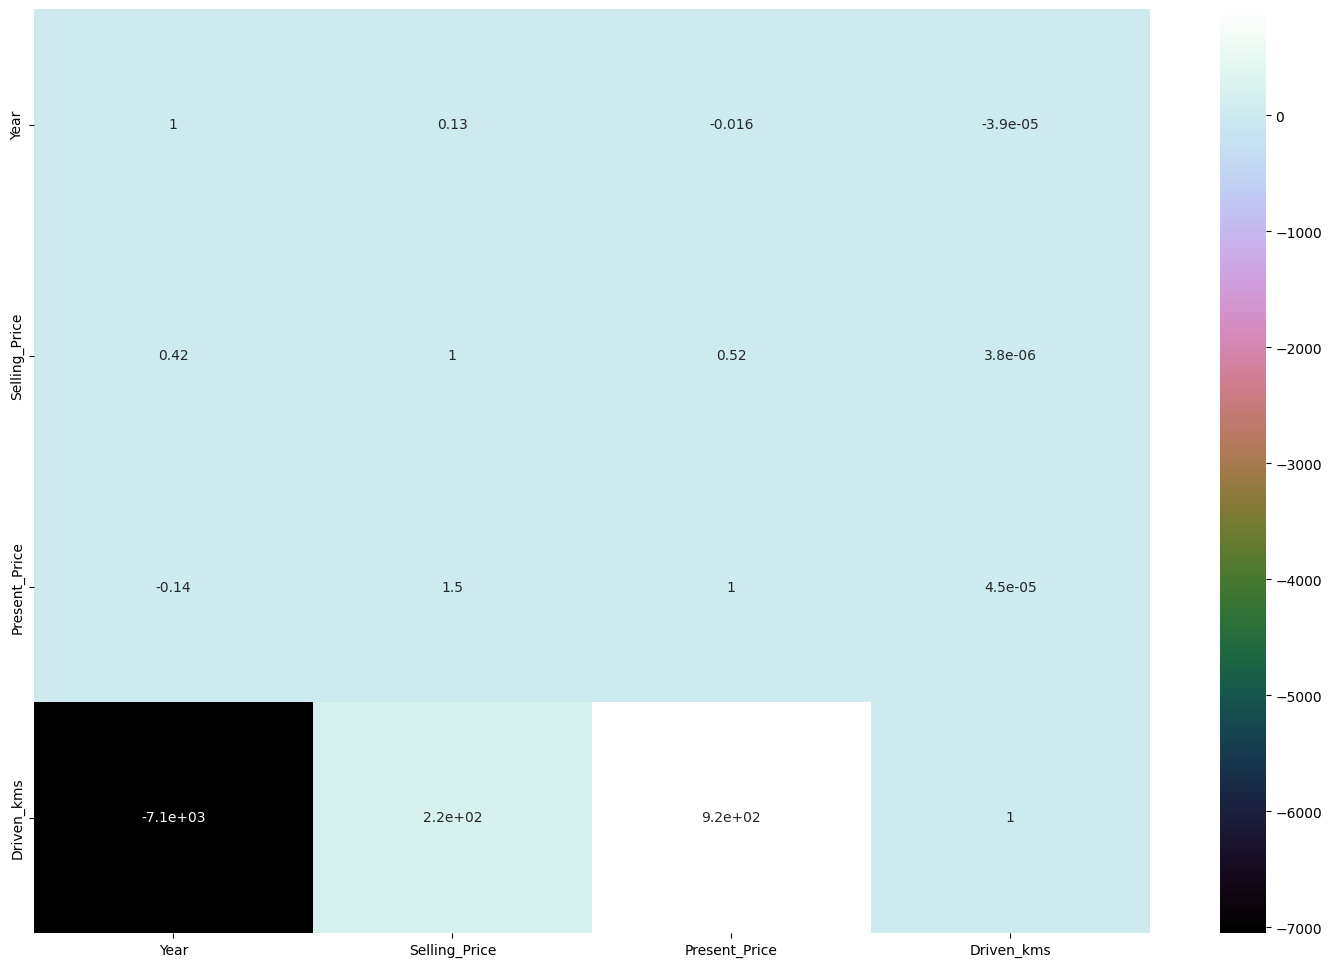

In [65]:
#Set the size of the plot
plt.figure(figsize=(18,12))
#Create a heatmap with annotations and a color map
sns.heatmap(data_corr,annot=True,cmap="cubehelix")
#Display the plot
plt.show()

### Visualising Data

### Data visualisation helps illustrate how various factors influence the price variable
### HEATMAP

In [54]:
#Compute correlations between variables in the dataset for heatmap visualization
numeric_data =data.select_dtypes(include=['float64', 'int64'])
data_corr = numeric_data.cov() / (numeric_data.std() * numeric_data.std())
print(data_corr)

                      Year  Selling_Price  Present_Price  Driven_kms
Year              1.000000       0.134338      -0.015789   -0.000039
Selling_Price     0.415092       1.000000       0.516901    0.000004
Present_Price    -0.141054       1.494467       1.000000    0.000045
Driven_kms    -7051.580968     223.300627     916.168064    1.000000


### Variables Selling_Price and Present_Price have a strong correlation(around 1.5) indicating direct relationship
### Present_Price shows a good correlation with Selling_Price(0.52),making it a key factor in price prediction

<Axes: xlabel='Present_Price', ylabel='Selling_Price'>

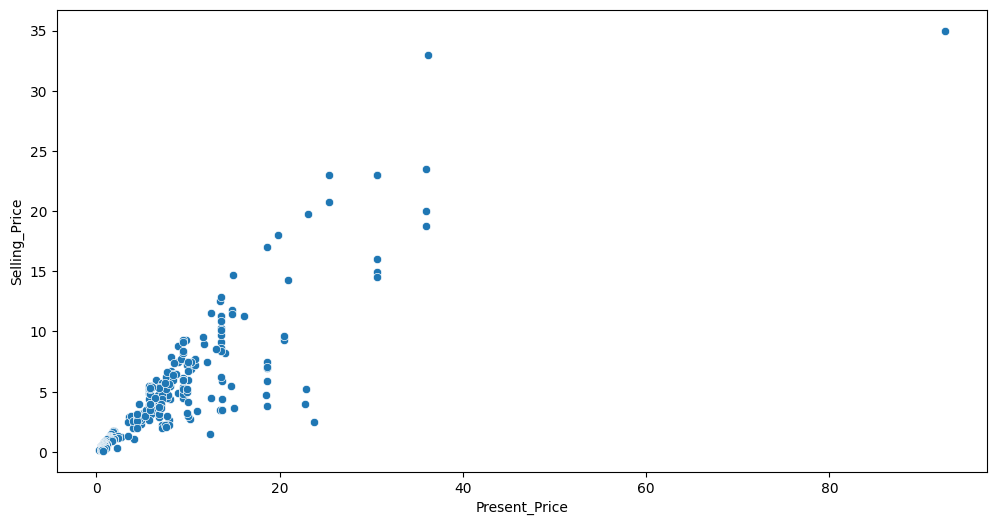

In [71]:
#Using a scatter plot to analyze the relationship between different factors and Selling_Price
#Scatter plot: Present_Price vs Selling_Price
plt.figure(figsize=(12,6))
sns.scatterplot(data=data,x=data['Present_Price'],y=data['Selling_Price'])


<Axes: xlabel='Driven_kms', ylabel='Selling_Price'>

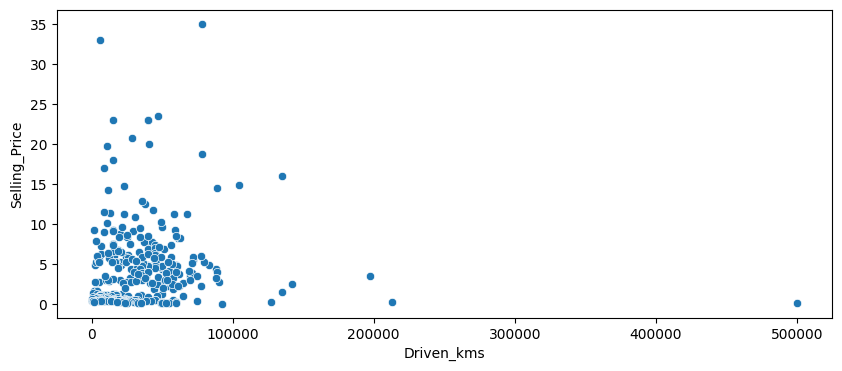

In [73]:
#Scatter plot:Driven_kms vs Selling_Price
plt.figure(figsize=(10,4))
sns.scatterplot(data=data ,x=data['Driven_kms'],y=data['Selling_Price'])

<Axes: xlabel='Year', ylabel='Selling_Price'>

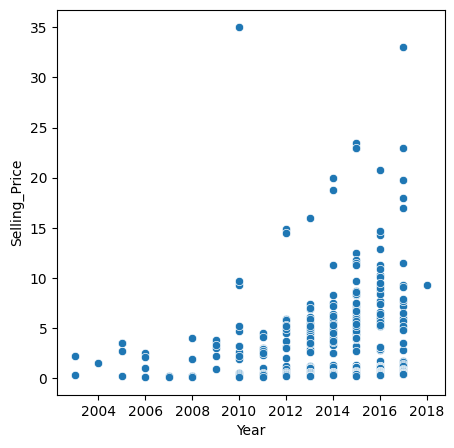

In [75]:
#Scatter plot: Year vs Selling_Price
plt.figure(figsize=(5,5))
sns.scatterplot(data=data,x=data['Year'],y=data['Selling_Price'])

### The plots indicate that Present_Price has a strong positive correlation with Selling_Price ,while Driven_kms and Year show more dispersed trends

In [78]:
#Encoding Categorical Variables into Numeric representations
from sklearn.preprocessing import LabelEncoder 
# Create a LabelEncoder object 
encoder=LabelEncoder()
#Encode categorical columns
for col in ['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission']:
      data[col]=encoder.fit_transform(data[col])
data.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission
0,90,11,59,58,86,2,0,1
1,93,10,78,105,135,1,0,1
2,68,14,112,107,26,2,0,1
3,96,8,52,49,18,2,0,1
4,92,11,76,74,134,1,0,1


### Model Development

In [84]:
#Importing train-test split function
from sklearn.model_selection import train_test_split
#Defining independent variables and dependent variables 
Z,a=data.drop(columns=['Car_Name','Selling_Price']),data['Selling_Price']

In [86]:
#Dividing the dataset into training and testing sets 
#75% of the data is used for training ,and 25% for testing
M_train,M_test,n_train,n_test =train_test_split(Z,a,train_size=0.75)
#Displaying the dimensions of testing and training sets
print('Testing data shape:',M_test.shape)
print('Training data shape:',M_train.shape)
print('Target variable for testing:',n_test.shape)
print('Target variable for training :',n_train.shape)

Testing data shape: (76, 6)
Training data shape: (225, 6)
Target variable for testing: (76,)
Target variable for training : (225,)


### Train the model using the training dataset

In [87]:
#Importing the LinearRegression class from the sklearn library
from sklearn.linear_model import LinearRegression

In [88]:
#Implementing a linear Regression model(a type of supervised learning algorithm)
#This model establishes a linear relationship between input features and the target variable
lr=LinearRegression()

In [89]:
#Training the Linear Regression model using the training dataset
lr.fit(M_train,n_train)

LinearRegression()

### Estimating the Car's Selling_Price

In [90]:
#Estimating the car price using test data
predicted_values=lr.predict(M_test)
predicted_values

array([ -1.66899934, -28.85538041,  49.45422095, 120.09578631,
        50.48543916,  29.95295306,  41.70394455,   7.77790945,
       110.37214594,  68.53437654,  48.74505193,  65.89796374,
        50.30653758, 116.33125113,  93.46917833,  37.93940937,
        98.45342407, 116.56098259,  49.17897966,  88.8745717 ,
        -0.80746228, 119.92496051,  35.77323185,   8.97615947,
       115.70974167, 126.28083961, -10.42299225,  32.68310162,
        40.7619644 , 105.95788527,  78.3107891 ,  42.7331129 ,
        93.08398342,  68.65153089,  77.72481968, 112.69143243,
        33.63289772,  49.18911018,  65.16027895,  89.14794317,
        12.324184  ,  67.86881249,  23.36862129,  29.62859965,
        84.11007896,  19.62233235,  69.53846172,  51.89563976,
        24.08820971,  76.49667821, 119.36518742,  82.47275953,
       104.29194908, 110.54671545,  41.14458603,  48.39882967,
        37.88594945, 113.27386528, 105.81837091,  41.97064469,
       158.26034401,  59.91409086, 122.58182416,  40.10

### Evaluate model's performance

In [91]:
#Importing the mean squared error metric from sklearn
from sklearn.metrics import mean_squared_error

In [95]:
#Evaluating the difference between actual and predicted values
mse_value=mean_squared_error(n_test,predicted_values)
print("Mean Squared Error:",mse_value)

Mean Squared Error: 154.55398880529572


In [98]:
#Bringing in the function to measure the model's goodness of fit
from sklearn.metrics import r2_score as determination_coefficient
r2_value=determination_coefficient(n_test,predicted_values)
print("r-squared:",r2_value)


r-squared: 0.914833386376817
